# K-means clustering: using "sklearn" and sythetic data

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [1]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/MyDrive/NOTEBOOK/TC1002S/NotebooksStudents/A01643954/"

else:
    # Define path del proyecto
    Ruta            = ""

Mounted at /content/drive


In [2]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [3]:
# Dataset url
url = Ruta + "datasets/iris/iris.csv"

# Load the dataset
df  = pd.read_csv(url, header=None)



# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [4]:
# Add column names
column_names = ["Longituddelsépalo", "Anchodelsépalo", "Longituddelpétalo", "Anchodelpétalo", "Especies(Tipodeflor)"]
df.columns = column_names

# Print DataFrame with column names
df

,Longituddelsépalo,Anchodelsépalo,Longituddelpétalo,Anchodelpétalo,Especies(Tipodeflor)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# get the number of observations and variables
df.shape


(150, 5)

2. Drop rows with any missing values


In [6]:
# Drop rows with NaN values if existing
df.dropna()

# Print the new shape
print(df.shape)

(150, 5)


3. Scatterplot




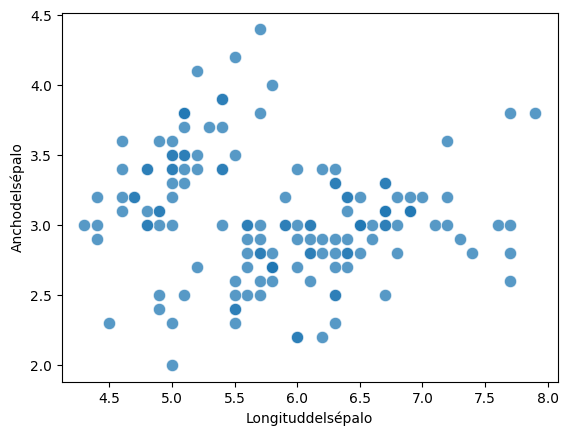

In [8]:
# Scatterplot of x1 and x2
sns.scatterplot(data=df, x="Longituddelsépalo", y="Anchodelsépalo", s=80, alpha=0.75)
plt.show()

Difficult to plot independetly all combinations, let's use pairplot

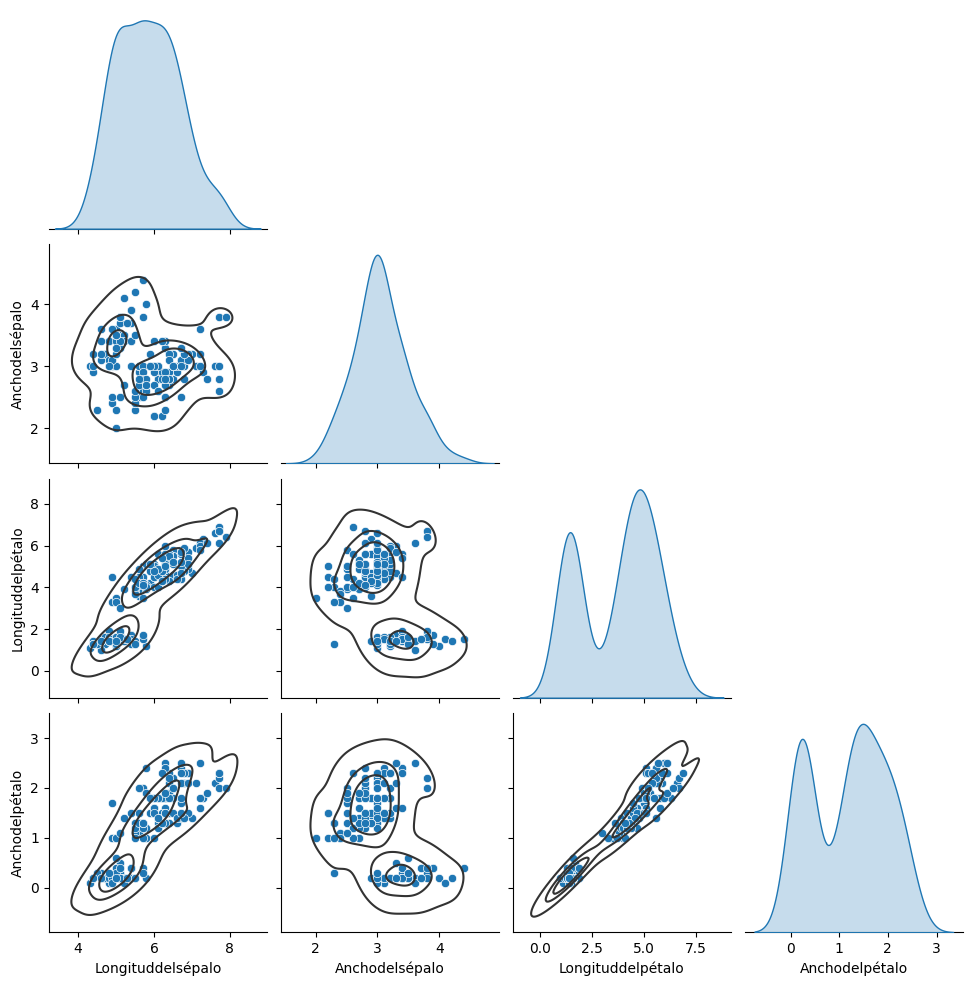

In [9]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(df, corner =True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

In [10]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 2 # Let's assume there are 2,3,4,5...? clusters/groups

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
#yestimated = km.fit_predict(df)
yestimated = km.fit_predict(df[['Longituddelsépalo','Anchodelsépalo']] )
#yestimated = km.fit_predict(df[['x1','x3']] )

# Print estimated cluster of each point in the dataset
yestimated

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [11]:
# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated

df

,Longituddelsépalo,Anchodelsépalo,Longituddelpétalo,Anchodelpétalo,Especies(Tipodeflor),yestimated
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1


In [12]:
# Print the Labels/Names of the existing clusters
df.yestimated.unique()

array([0, 1], dtype=int32)

In [13]:
# Cluster centroides
km.cluster_centers_


array([[5.15      , 3.16891892],
       [6.51842105, 2.94868421]])

In [14]:
# Sum of squared error (sse) of the final model
km.inertia_

58.44759246088195

In [15]:
# The number of iterations required to converge
km.n_iter_

3

# <span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Compute the number of points in each cluster

In [16]:
# Get a dataframe with the data of each clsuter
df0 = df[df.yestimated==0]
df1 = df[df.yestimated==1]
df2 = df[df.yestimated==2]

# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]
NpointsCluster2 = df2.shape[0]
#['Longituddelsépalo','Longituddelpétalo']
# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 02: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

Number of points in clusters 0: 74
Number of points in clusters 1: 76
Number of points in clusters 02: 0
Total Number of points in the clusters: 150


# Plot estimated clusters

Plot estimated clusters

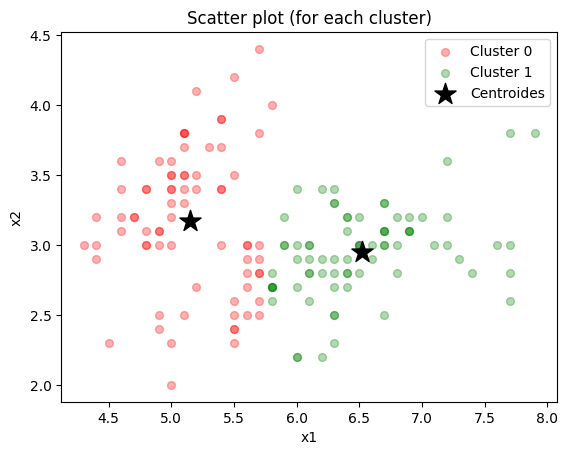

In [17]:
# Get a dataframe with the data of each clsuter
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
#['Longituddelsépalo','Longituddelpétalo']

# Scatter plot of each cluster
plt.scatter(df1.Longituddelsépalo, df1.Anchodelsépalo, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.Longituddelsépalo, df2.Anchodelsépalo, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [18]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['Longituddelsépalo','Longituddelpétalo']])
    # Save sse for each k
    sse.append(km.inertia_)


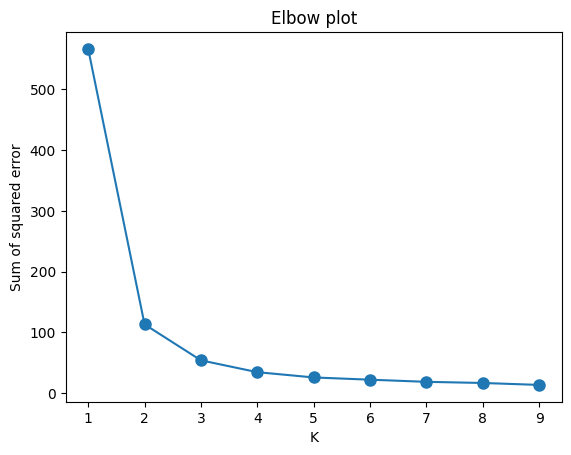

In [19]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Observations?



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity:

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions

# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(150, 5)


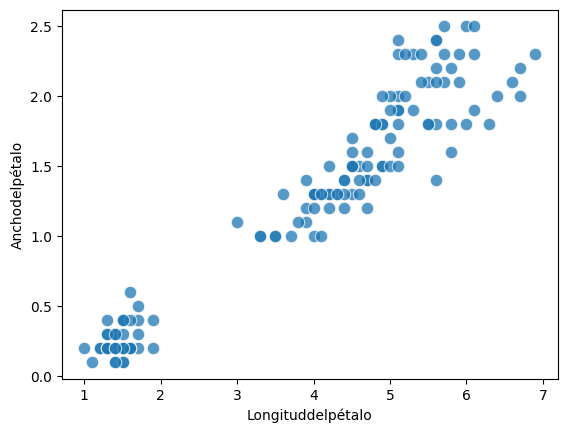

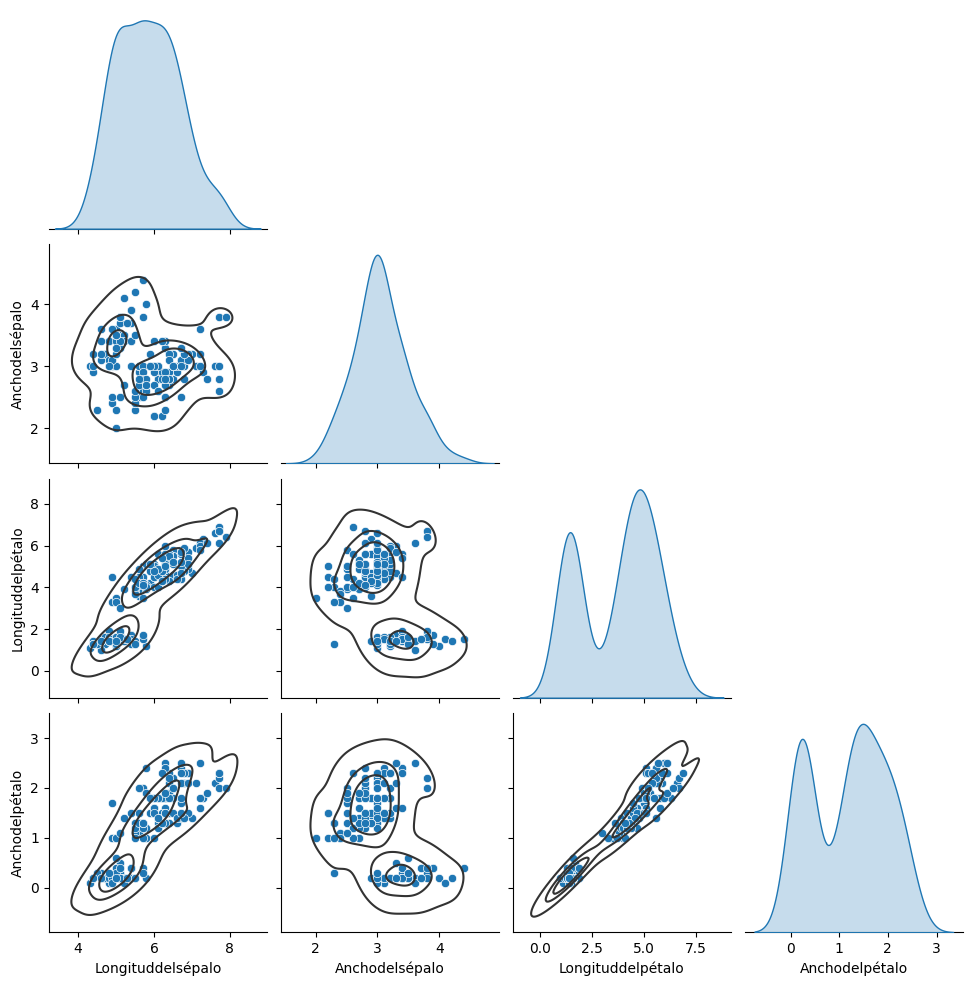

Number of points in clusters 0: 99
Number of points in clusters 1: 51
Number of points in clusters 02: 0
Total Number of points in the clusters: 150


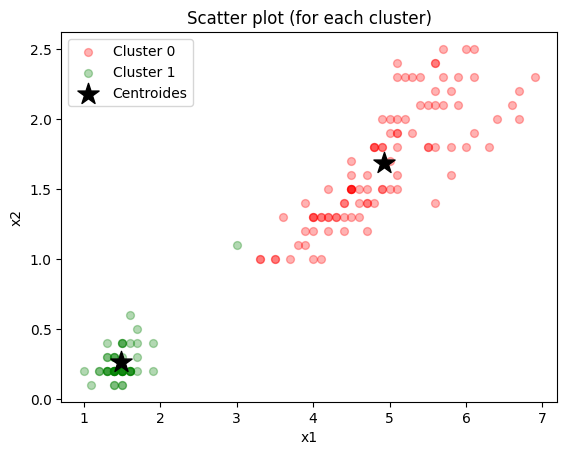

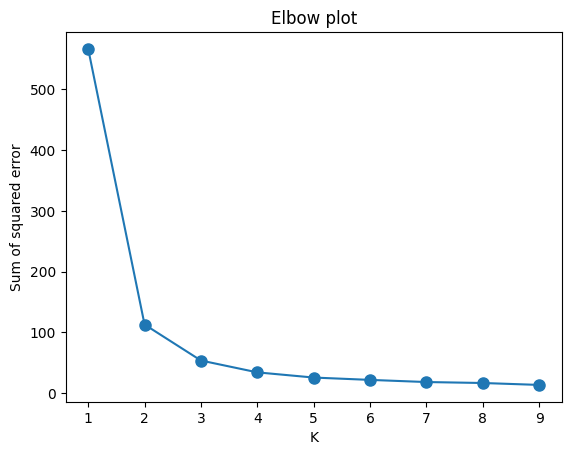

"Choose the k after which the sse is minimally reduced\n\n<span style='color:Blue'> **Important remarks**  </span>\n\n- Observations?\n\n# Final remarks\n\n- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm\n\n- The number of clusters have to be defined by the user (i.e., by you ¡¡)\n\n- The number assigned to each cluster is randomly assigned from set 0, 1, 2\n\n- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k\n\n- The order of the number in each cluster is random\n\n- The **sklearn** package provides the tools for data processing suchs as k-means\n\n# Activity:\n\n1. Repeat this analysis using other pair of features, e.g., x3 and x6\n\n2. Repeat this analysis using all six features, e.g., x1, x2,..., x6\n\n3. Provide conclusions\n\n# Activity: work with the iris dataset\n\n    \n1. Do clustering with the iris flower dataset to form clusters using as 

In [20]:
# -*- coding: utf-8 -*-
"""Copia de Copia de D1_3Kmeans_UsingSyntheticData.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1MGxzjLfzCpiFEb-hlwwzTr-sh7gVui7k

# K-means clustering: using "sklearn" and sythetic data

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx

# Importing libraries
"""

# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/MyDrive/NOTEBOOK/TC1002S/NotebooksStudents/A01643954/"

else:
    # Define path del proyecto
    Ruta            = ""

# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Dataset url
url = Ruta + "datasets/iris/iris.csv"

# Load the dataset
df  = pd.read_csv(url, header=None)

# Add column names
column_names = ["Longituddelsépalo", "Anchodelsépalo", "Longituddelpétalo", "Anchodelpétalo", "Especies(Tipodeflor)"]
df.columns = column_names

# Print DataFrame with column names
df

# get the number of observations and variables
df.shape

"""2. Drop rows with any missing values

"""

# Drop rows with NaN values if existing
df.dropna()

# Print the new shape
print(df.shape)

"""3. Scatterplot



"""

# Scatterplot of x1 and x2
sns.scatterplot(data=df, x="Longituddelpétalo", y="Anchodelpétalo", s=80, alpha=0.75)
plt.show()

"""Difficult to plot independetly all combinations, let's use pairplot"""

# Pairplot: Scatterplot of all variables
g = sns.pairplot(df, corner =True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

"""It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering
"""

# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 2 # Let's assume there are 2,3,4,5...? clusters/groups

# Create/Initialize the Kmeans box/object
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
#yestimated = km.fit_predict(df)
yestimated = km.fit_predict(df[['Longituddelpétalo','Anchodelpétalo']] )
#yestimated = km.fit_predict(df[['x1','x3']] )

# Print estimated cluster of each point in the dataset
yestimated

# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated

df

# Print the Labels/Names of the existing clusters
df.yestimated.unique()

# Cluster centroides
km.cluster_centers_

# Sum of squared error (sse) of the final model
km.inertia_

# The number of iterations required to converge
km.n_iter_

"""# <span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Compute the number of points in each cluster
"""

# Get a dataframe with the data of each clsuter
df0 = df[df.yestimated==0]
df1 = df[df.yestimated==1]
df2 = df[df.yestimated==2]

# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]
NpointsCluster2 = df2.shape[0]
#['Longituddelsépalo','Longituddelpétalo']
# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 02: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

"""# Plot estimated clusters

Plot estimated clusters
"""

# Get a dataframe with the data of each clsuter
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
#['Longituddelsépalo','Longituddelpétalo']

# Scatter plot of each cluster
plt.scatter(df1.Longituddelpétalo, df1.Anchodelpétalo, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.Longituddelpétalo, df2.Anchodelpétalo, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

"""# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation
"""

# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['Longituddelpétalo','Anchodelpétalo']])
    # Save sse for each k
    sse.append(km.inertia_)

# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

"""Choose the k after which the sse is minimally reduced

<span style='color:Blue'> **Important remarks**  </span>

- Observations?

# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity:

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions

# Activity: work with the iris dataset


1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics
"""

El algoritmo de clustering basado en los datos de pétalo presenta una serie de ventajas significativas sobre el algoritmo de clustering basado en los datos de sépalo en el contexto del análisis de especies de iris. Estas ventajas se derivan de varias características inherentes a los datos del pétalo que favorecen la coherencia intra-cluster, la reducción de la dispersión inter-cluster, la claridad estructural de los clústeres y la relevancia de la información para el problema específico, el algoritmo de clustering basado en los datos del pétalo tiende a generar clústeres con una mayor coherencia intra-cluster. Esto significa que las muestras dentro de cada grupo son más similares entre sí en términos de las características.